In [67]:
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
import numpy as np
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
from skimage.filters import gaussian
from skimage.draw import circle

In [4]:
coma_wcs_hdul = fits.open('/home/rt2122/Data/fulldepth_neo4_index.fits')

In [8]:
data = coma_wcs_hdul[1].data
idx = 0
coma_center = SkyCoord(ra=195*u.degree, dec=28*u.degree, frame='icrs')
dists = coma_center.separation(SkyCoord(ra=data['RA']*u.degree, 
                                        dec=data['DEC']*u.degree, frame='icrs')).degree
dists.min()

0.8614971076911733

In [9]:
dists.argmin()

19926

In [10]:
cur_line = data[dists.argmin()]
cur_line['RA'], cur_line['DEC']

(195.428964, 28.774444)

In [11]:
w = WCS(naxis=2)
w.wcs.cd = cur_line['CD']
w.wcs.cdelt = cur_line['CDELT']
w.wcs.crpix = cur_line['CRPIX']
w.wcs.crval = cur_line['CRVAL']
w.wcs.ctype = ['RA---TAN', 'DEC--TAN']
w.wcs.lonpole = cur_line['LONGPOLE']
w.wcs.latpole = cur_line['LATPOLE']
w.wcs.set_pv([(0, 0, 0)])
w.array_shape = (2048, 2048)

/home/rt2122/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: cdelt will be ignored since cd is present
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
cen_pix = w.all_world2pix(195, 28, 0)
cen_pix

[array(1519.3548547), array(10.50863901)]

In [14]:
w.all_pix2world(0, 0, 0)

[array(196.31422368), array(27.98980529)]

In [19]:
w.all_pix2world(2048, 0, 0)

[array(194.54280781), array(27.98979955)]

In [20]:
coma_data = fits.open('/home/rt2122/Data/coma_sweep/south/sweep-190p025-200p030.fits')

In [21]:
ra = coma_data[1].data['RA']
dec = coma_data[1].data['DEC']

In [39]:
flux_g = coma_data[1].data['FLUX_G']
flux_r = coma_data[1].data['FLUX_R']
flux_z = coma_data[1].data['FLUX_Z']

In [22]:
pixels = w.all_world2pix(ra, dec, 0)

In [55]:
pic = np.zeros((2048, 2048, 3), dtype=np.float64)

In [26]:
pixels

[array([-3561.14459858, -3559.61588496, -3558.31116748, ...,
        -1967.26615532, -2173.29274238, -1994.96594884]),
 array([-2044.36010754, -2046.11036453, -2044.06887598, ...,
         1515.16102256,  1520.26686352,  1515.99178659])]

In [56]:
for k in tqdm(range(pixels[0].shape[0])):
    i, j = pixels[0][k], pixels[1][k]
    if i >= 0 and j >= 0 and i < 2048 and j < 2048:
        i = int(i)
        j = int(j)
        pic[i, j, 0] = max(pic[i, j, 0], flux_g[k])
        pic[i, j, 1] = max(pic[i, j, 1], flux_r[k])
        pic[i, j, 2] = max(pic[i, j, 2], flux_z[k])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


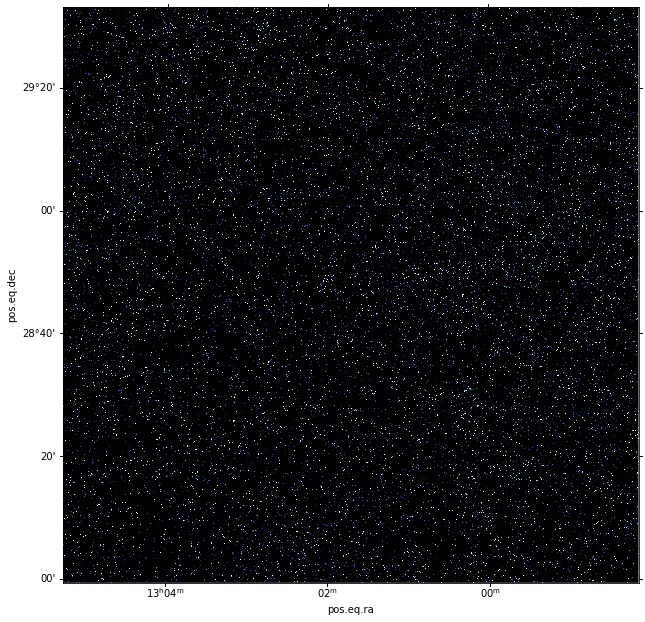

In [57]:
fig= plt.figure(figsize=(10,10))
ax= fig.add_axes([0.1,0.1,0.8,0.8], projection=w)

im = ax.imshow(pic, cmap=plt.get_cmap('viridis'), 
               interpolation='nearest', vmin=0, vmax=5)

In [60]:
pic_gauss = gaussian(pic, 5)

/home/rt2122/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  """Entry point for launching an IPython kernel.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


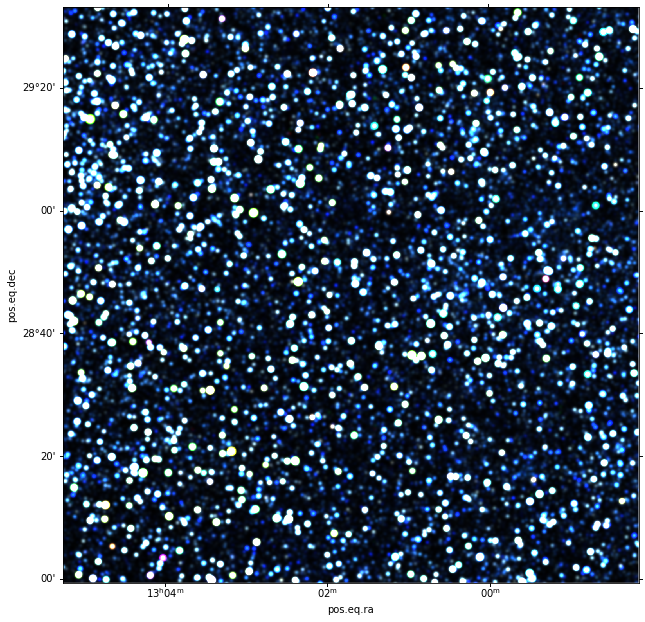

In [61]:
fig= plt.figure(figsize=(10,10))
ax= fig.add_axes([0.1,0.1,0.8,0.8], projection=w)

im = ax.imshow(pic_gauss, cmap=plt.get_cmap('viridis'), 
               interpolation='nearest', vmin=0, vmax=5)

In [62]:
pic.max()

72449.7109375

In [63]:
w.all_world2pix(195, 28, 0)

[array(1519.3548547), array(10.50863901)]

In [81]:
pic[circle(1519, 10, 500, shape=pic.shape), 0] = 1000000000000

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


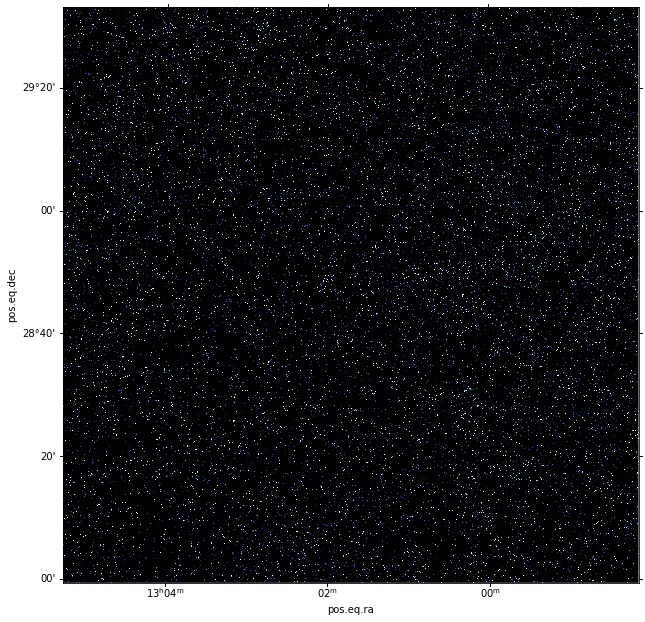

In [82]:
fig= plt.figure(figsize=(10,10))
ax= fig.add_axes([0.1,0.1,0.8,0.8], projection=w)

im = ax.imshow(pic, cmap=plt.get_cmap('viridis')) 
               #interpolation='nearest', vmin=0, vmax=1)

In [80]:
pic.max()

1000000000000.0